Recognition of green apples imaged from the top.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

In [3]:
CODE_DIR = os.environ['CODEROOT']
for lib_name in ('visionfuncs', ):
    lib_path = os.path.join(CODE_DIR, lib_name)
    if lib_path not in sys.path:
        sys.path.append(lib_path)

In [4]:
from visionfuncs import io
from visionfuncs import improc
from visionfuncs import corners
from visionfuncs import regions

In [5]:
from helpers import imshow, show_channels

In [6]:
im_apples = io.open_image('apples_top.jpg', cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

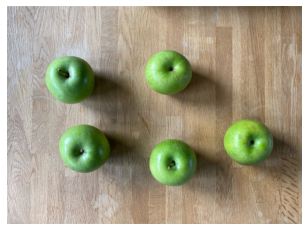

In [7]:
imshow(im_apples)

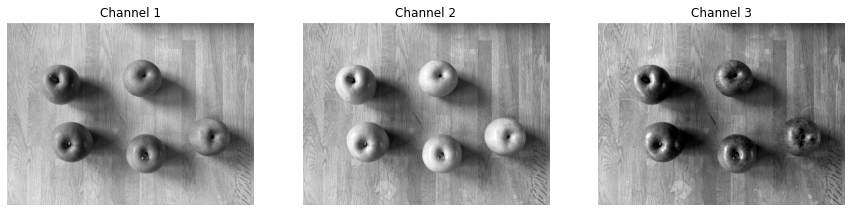

In [8]:
show_channels(im_apples)

In [9]:
im_apples_green = im_apples[:, :, 1] # 0, 1, 2

In [10]:
# 0 255

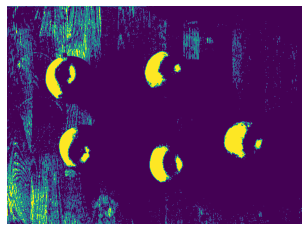

In [11]:
green_mask_from_rgb = regions.threshold_binary(im_apples_green, 200)

imshow(green_mask_from_rgb)

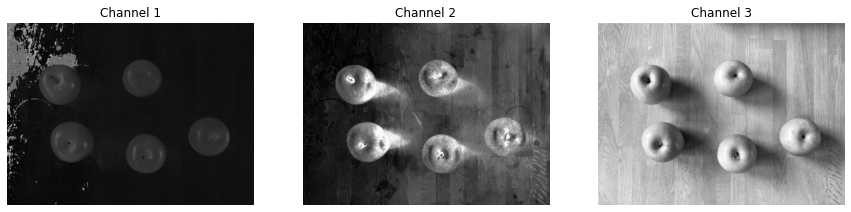

In [12]:
im_hsv = cv2.cvtColor(im_apples, cv2.COLOR_RGB2HSV)

show_channels(im_hsv)

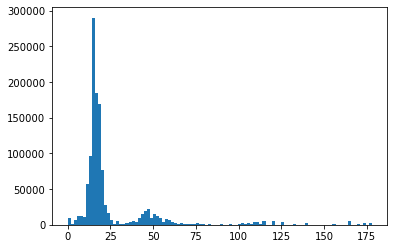

In [13]:
plt.hist(im_hsv[:, :, 0].ravel(), bins=100)
plt.show()

In [14]:
green_mask_from_hsv = regions.mask_threshold_range(im_hsv[:, :, 0], 35, 75)

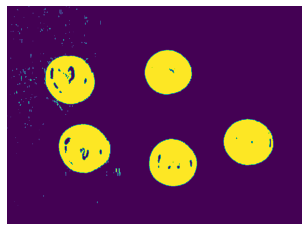

In [15]:
imshow(green_mask_from_hsv)

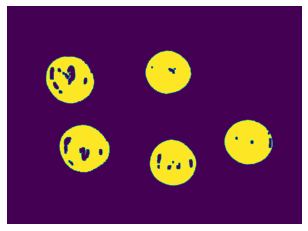

In [16]:
im_eroded = improc.erode(green_mask_from_hsv, kernel_size=7)

imshow(im_eroded)

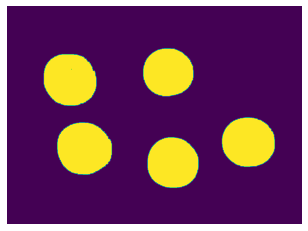

In [17]:
im_dilated = improc.dilate(im_eroded, kernel_size=11, n_iter=2)

imshow(im_dilated)

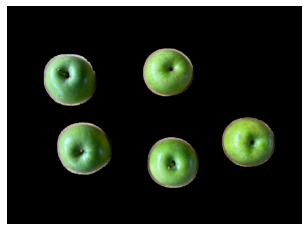

In [18]:
im_masked = regions.apply_mask(im_apples, im_dilated)

imshow(im_masked)

In [19]:
ccomp_labels, ccomp_stats = regions.find_ccomp(im_dilated)

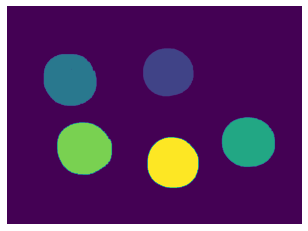

In [20]:
imshow(ccomp_labels)

In [21]:
ccomp_stats

,left,top,width,height,area,x,y
0,0,0,1280,945,1010438,646.417844,466.133621
1,591,184,218,207,36252,698.560079,287.269392
2,160,209,228,223,41583,272.387274,318.982589
3,933,483,229,214,39451,1047.226788,589.971712
4,218,505,237,226,42758,334.045535,617.311240
5,610,569,221,219,39118,719.001585,679.578838
